Problema de Regressão: Preço de Venda de Casas
=========================

Utilizado o seguinte Dataset do Kaggle: [Ames Housing](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Os Datasets estão divididos em treino e teste, resolvi então utilizar somente o de treino para não ser necessário fazer um merge dos dois.

**OBS**: Como o dataset tinha diversos pontos a serem acertados como valores faltantes e diversas variáveis categóricas (onde acabei por gerar outras colunas binarizando os valores existentes), fiz todo esse tratamento do Dataset e salvei ele já tratado para não esse notebook não ficar muito extenso. Esse notebook utiliza desse dataset tratado.


In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [3]:
df = pd.read_csv('/mydrive/RecPad/train_tratado.csv')

In [4]:
df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,CentralAir_new,Street_new,PavedDriveY,PavedDriveN,PavedDriveP,CollgCr,Veenker,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,Sawyer,NridgHt,NAmes,SawyerW,IDOTRR,MeadowV,Edwards,Timber,Gilbert,StoneBr,ClearCr,NPkVill,Blmngtn,BrDale,SWISU,Blueste,Attchd,Detchd,BuiltIn,CarPort,Basment,2Types,Gd,TA,Ex,Fa,Gtl,Mod,Sev,FireplaceQu_new,GarageQual_new,GarageCond_new,ExterCond_new,HeatingQC_new,Inside,FR2,Corner,CulDSac,FR3,RL,RM,C (all),FV,RH,AreaTotal_new,GaragemRel_new,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,3,5,5,4,0,1,0,0,0,0,1,0,0,0,0,2566,25,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,5,5,5,4,0,0,1,0,0,0,1,0,0,0,0,2524,25,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,5,5,5,4,0,1,0,0,0,0,1,0,0,0,0,2706,25,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2,5,5,4,2,0,0,1,0,0,1,0,0,0,0,2473,25,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,5,5,5,4,0,0,1,0,0,0,1,0,0,0,0,3343,25,250000


In [5]:
dataset = np.asarray(df)
X = dataset[:,:-1]
y = dataset[:,-1:]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X, y)

ypred = modelo.predict(X)

In [7]:
mean_squared_error(y, ypred)

955980829.4251918

In [8]:
modelo.intercept_

array([-389204.58751767])

In [9]:
modelo.coef_

array([[ 4.11649301e+00,  1.16585242e+04,  8.81415889e+01,
         2.12986530e+02,  1.26090106e+01,  1.43579268e+01,
         1.16913948e+00,  2.32464753e+01,  1.87569179e+01,
         5.37631474e+00,  3.41655852e+03,  2.02912327e+03,
         5.23967185e+03, -1.06246662e+02,  1.36004281e+04,
         1.34441875e+01,  2.69890006e+01,  2.64206304e+01,
         7.27023341e+03,  6.87936833e+03,  1.81297720e+03,
        -2.90052975e+03,  1.08755255e+03, -2.00133048e+02,
         2.26583335e+04,  1.79162805e+04,  5.22270963e+04,
        -1.49482961e+04,  6.82072248e+03, -1.23850559e+04,
        -1.28653879e+04,  1.92365156e+03, -8.88201380e+03,
         3.14588183e+04, -8.70741332e+03, -6.08567449e+03,
         1.20759809e+03, -1.72233419e+04, -1.85972002e+04,
         7.35617680e+03, -3.51719542e+03,  4.04974248e+04,
         2.07771084e+03, -2.04138324e+04, -1.42658777e+04,
        -1.83957897e+04, -1.29282812e+04, -1.47283200e+04,
        -1.59757017e+04, -1.97727791e+04, -1.14303527e+0

In [10]:
delta = 50000
intercepts = np.linspace((-389204.58751767 - delta), (-389204.58751767 + delta), 50)

def erroModeloAlteracaoIntercept(inter):
  Erro = np.empty(inter.shape)

  for i in range(Erro.shape[0]):
    modelo.intercept_ = inter[i]
    ypred = modelo.predict(X)
    mse = mean_squared_error(y, ypred)
    Erro[i] = mse
  return Erro

erro = erroModeloAlteracaoIntercept(intercepts)

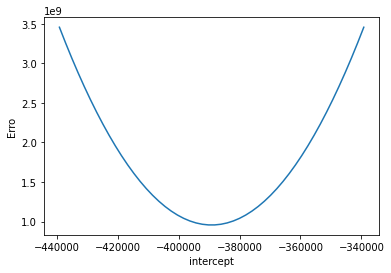

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.ylabel("Erro")
plt.xlabel("intercept")
plt.plot(intercepts, erro)